In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
import sys
import pickle
from matplotlib.ticker import NullFormatter
import matplotlib.path as mpath
import matplotlib.patches as patches


path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    sys.path.append(path)

import neurolib.dashboard.data as data
from neurolib.models.aln import ALNModel
import neurolib.dashboard.layout as layout
import neurolib.dashboard.functions as functions
import neurolib.utils.func_optimize as fo


# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [2]:
cmap = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors()
exc_red = cmap(3)
inh_blue=cmap(0)
green = cmap(2)

rgb_cm = cmap.colors

aln = ALNModel()
data.set_parameters(aln)
state_vars = aln.state_vars

In [3]:
readpath = '.' + os.sep

with open(readpath + os.sep + 'bi.pickle','rb') as file:
    load_array= pickle.load(file)
ext_exc = load_array[0]
ext_inh = load_array[1]

grid_resolution = layout.grid_resolution

dist_up_regime = np.zeros((len(ext_exc), 2))
dist_down_regime = np.zeros((len(ext_exc)))

cmap = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors()
exc_red = cmap(3)
inh_blue=cmap(0)
green = cmap(2)
aln = ALNModel()
data.set_parameters(aln)
state_vars = aln.state_vars

def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]

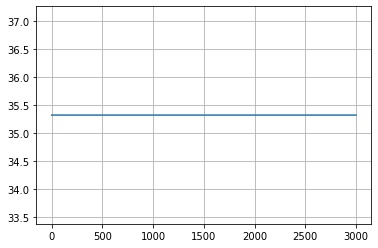

In [4]:
i = 10

aln.params.ext_exc_current = ext_exc[i] * 5. + 0.1
aln.params.ext_inh_current = ext_inh[i] * 5.

aln.params.duration = 3000.

control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = 5.)
aln.run(control=control0)

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]

initVars = init_state_vars

setinit(initVars, aln)
aln.run(control=aln.getZeroControl())
plt.plot(aln.t[:], aln.rates_exc[0,:])

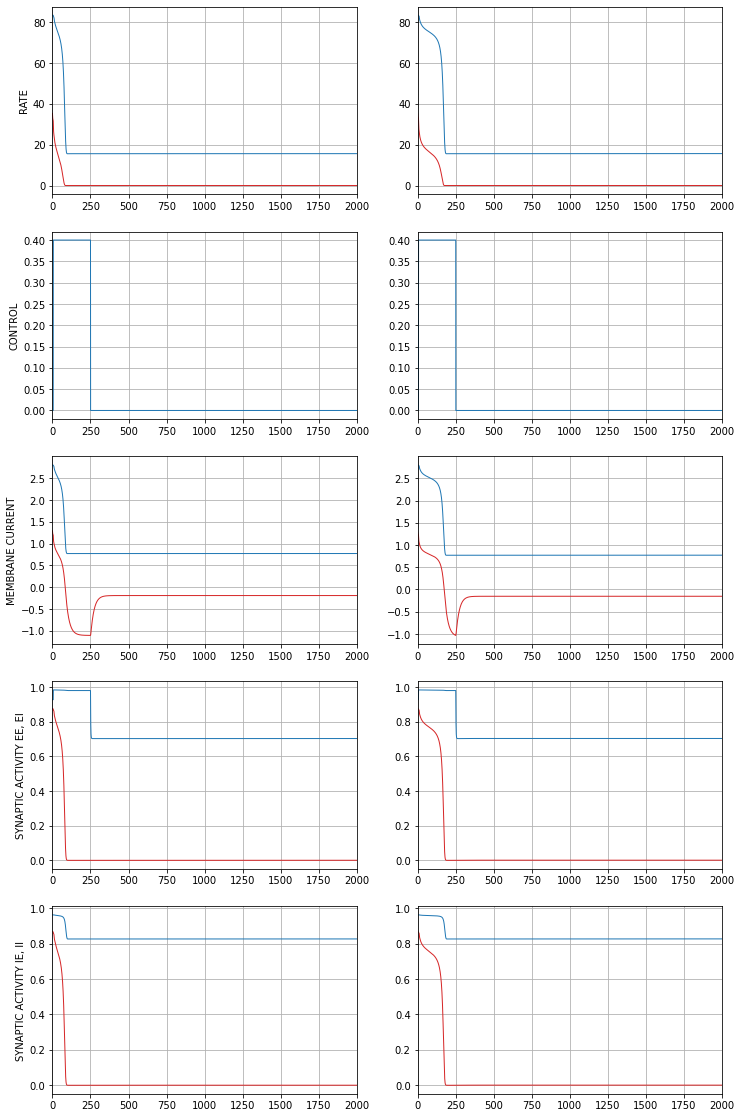

In [6]:
dt = 0.01
aln.params.dt = dt
fontsize_ = 12
linewidth_ = 1
transition_time_ = 0.95
dur = 2000.
aln.params.duration = dur

control_ = aln.getZeroControl()
control_[0,3,500:25000] = 0.4
aln.params.duration = (control_.shape[2] - 1.) * dt
output_vars = aln.output_vars

fig, axs = plt.subplots( 5,2, figsize=(12, 20) ) #, constrained_layout=True
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.2)

#data.set_parameters(aln)

aln.params.ext_exc_current = ext_exc[i] * 5.
aln.params.ext_inh_current = ext_inh[i] * 5.

setinit(initVars, aln)
aln.run(control=control_)

axs[0,0].plot(aln.t, aln.state[aln.state_vars[0]][0,:], linewidth=linewidth_, color=exc_red)
axs[0,0].plot(aln.t, aln.state[aln.state_vars[1]][0,:], linewidth=linewidth_, color=inh_blue)
axs[1,0].plot(aln.t, control_[0,3,:], linewidth=linewidth_, color=inh_blue, label='EI')

axs[2,0].plot(aln.t, aln.state[aln.state_vars[2]][0,:], linewidth=linewidth_, color=exc_red)
axs[2,0].plot(aln.t, aln.state[aln.state_vars[3]][0,:], linewidth=linewidth_, color=inh_blue)

axs[3,0].plot(aln.t, aln.state[aln.state_vars[5]][0,:], linewidth=linewidth_, color=exc_red)
axs[3,0].plot(aln.t, aln.state[aln.state_vars[6]][0,:], linewidth=linewidth_, color=inh_blue)

axs[4,0].plot(aln.t, aln.state[aln.state_vars[7]][0,:], linewidth=linewidth_, color=exc_red)
axs[4,0].plot(aln.t, aln.state[aln.state_vars[8]][0,:], linewidth=linewidth_, color=inh_blue)

axs[0,0].set_ylabel('RATE')
axs[1,0].set_ylabel('CONTROL')
axs[2,0].set_ylabel('MEMBRANE CURRENT')
axs[3,0].set_ylabel('SYNAPTIC ACTIVITY EE, EI')
axs[4,0].set_ylabel('SYNAPTIC ACTIVITY IE, II')


aln.params.ext_exc_current = ext_exc[i] * 5. + 0.04
#control_[0,3,5000:6000] = 0.2

setinit(initVars, aln)
aln.run(control=control_)

axs[0,1].plot(aln.t, aln.state[aln.state_vars[0]][0,:], linewidth=linewidth_, color=exc_red)
axs[0,1].plot(aln.t, aln.state[aln.state_vars[1]][0,:], linewidth=linewidth_, color=inh_blue)
axs[1,1].plot(aln.t, control_[0,3,:], linewidth=linewidth_, color=inh_blue, label='EI')

axs[2,1].plot(aln.t, aln.state[aln.state_vars[2]][0,:], linewidth=linewidth_, color=exc_red)
axs[2,1].plot(aln.t, aln.state[aln.state_vars[3]][0,:], linewidth=linewidth_, color=inh_blue)

axs[3,1].plot(aln.t, aln.state[aln.state_vars[5]][0,:], linewidth=linewidth_, color=exc_red)
axs[3,1].plot(aln.t, aln.state[aln.state_vars[6]][0,:], linewidth=linewidth_, color=inh_blue)

axs[4,1].plot(aln.t, aln.state[aln.state_vars[7]][0,:], linewidth=linewidth_, color=exc_red)
axs[4,1].plot(aln.t, aln.state[aln.state_vars[8]][0,:], linewidth=linewidth_, color=inh_blue)


for k in range(5):
    for j in range(2):
        axs[k,j].set_xlim(0.,2000.)

plt.show()

0
276.4
1
276.40999999999997
2
276.41999999999996
3
276.42999999999995
4
276.44
5
276.45
6
276.46
7
276.46999999999997
8
276.47999999999996
9
276.48999999999995


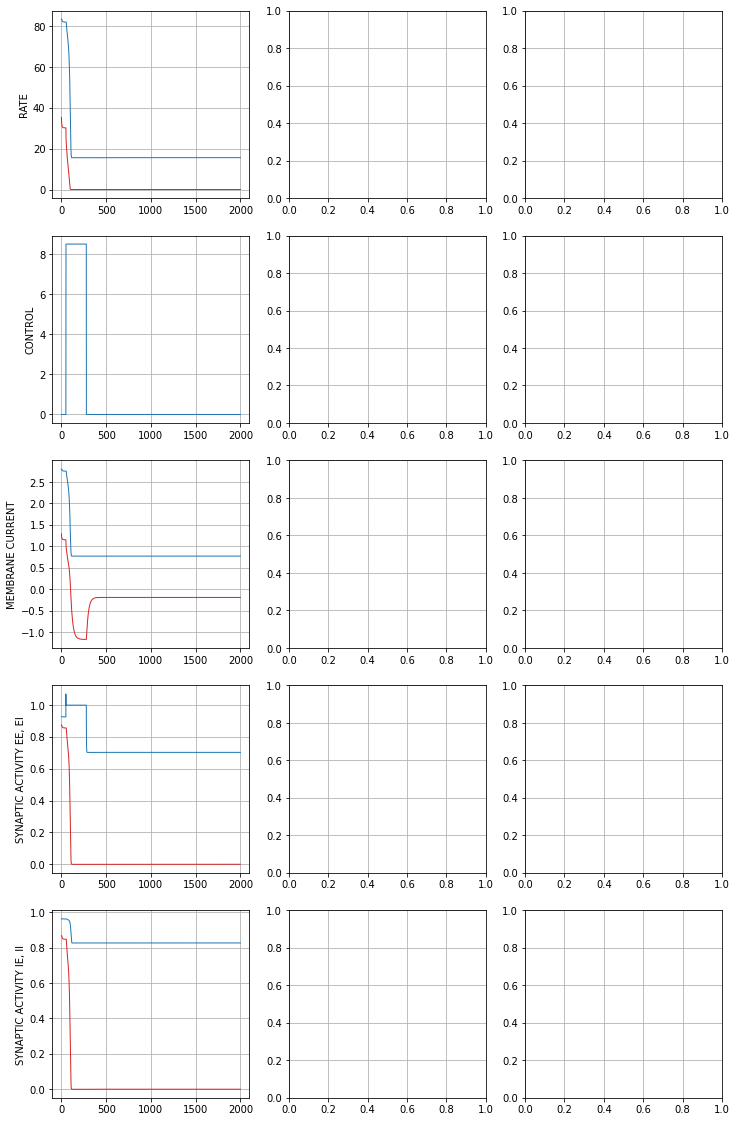

In [7]:
dt = 0.01
aln.params.dt = dt
control_ = aln.getZeroControl()
control_[0,3,int(50/dt):int(278/dt)] = 8.5
aln.params.duration = (control_.shape[2] - 1.) * dt
output_vars = aln.output_vars

init_vars_trans = np.zeros(( len(state_vars) ,100))

data.set_parameters(aln)

aln.params.ext_exc_current = ext_exc[i] * 5.
aln.params.ext_inh_current = ext_inh[i] * 5.

for k in range(10):
    print(k)
    aln.params.duration = 276.4+0.01*k
    print(aln.params.duration)
    control1 = aln.getZeroControl()
    control1[0,3,int(50/dt):int(278/dt)] = 8.5
    setinit(initVars, aln)
    aln.run(control=control1)
    for j in range(len(state_vars)):
        if aln.state[state_vars[j]].size == 1:
            init_vars_trans[j,k] = aln.state[state_vars[j]][0]
        else:
            init_vars_trans[j,k] = aln.state[state_vars[j]][0,-1]

aln.params.duration = dur
setinit(initVars, aln)
aln.run(control=control_)


fig, axs = plt.subplots( 5,3, figsize=(12, 20) ) #, constrained_layout=True
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.2)

axs[0,0].plot(aln.t, aln.state[aln.state_vars[0]][0,:], linewidth=linewidth_, color=exc_red)
axs[0,0].plot(aln.t, aln.state[aln.state_vars[1]][0,:], linewidth=linewidth_, color=inh_blue)
axs[1,0].plot(aln.t, control_[0,3,:], linewidth=linewidth_, color=inh_blue, label='EI')

axs[2,0].plot(aln.t, aln.state[aln.state_vars[2]][0,:], linewidth=linewidth_, color=exc_red)
axs[2,0].plot(aln.t, aln.state[aln.state_vars[3]][0,:], linewidth=linewidth_, color=inh_blue)

axs[3,0].plot(aln.t, aln.state[aln.state_vars[5]][0,:], linewidth=linewidth_, color=exc_red)
axs[3,0].plot(aln.t, aln.state[aln.state_vars[6]][0,:], linewidth=linewidth_, color=inh_blue)

axs[4,0].plot(aln.t, aln.state[aln.state_vars[7]][0,:], linewidth=linewidth_, color=exc_red)
axs[4,0].plot(aln.t, aln.state[aln.state_vars[8]][0,:], linewidth=linewidth_, color=inh_blue)

axs[0,0].set_ylabel('RATE')
axs[1,0].set_ylabel('CONTROL')
axs[2,0].set_ylabel('MEMBRANE CURRENT')
axs[3,0].set_ylabel('SYNAPTIC ACTIVITY EE, EI')
axs[4,0].set_ylabel('SYNAPTIC ACTIVITY IE, II')

z1ei_1 = aln.state[aln.state_vars[19]]
seim_1 = aln.state[aln.state_vars[6]]

init_vars_notrans = np.zeros(( len(state_vars) ))


aln.params.ext_exc_current = ext_exc[i] * 5. + 0.12
#control_[0,3,5000:45000] = 0.2

aln.params.duration = 277
control1 = aln.getZeroControl()
control1[0,3,int(50/dt):int(278/dt)] = 8.5
setinit(initVars, aln)
aln.run(control=control1)
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_vars_notrans[j] = aln.state[state_vars[j]][0]
    else:
        init_vars_notrans[j] = aln.state[state_vars[j]][0,-1]

aln.params.duration = dur
setinit(initVars, aln)
aln.run(control=control_)

"""
axs[0,1].plot(aln.t, aln.state[aln.state_vars[0]][0,:], linewidth=linewidth_, color=exc_red)
axs[0,2].plot(aln.t, aln.state[aln.state_vars[1]][0,:], linewidth=linewidth_, color=inh_blue)

axs[1,1].plot(aln.t, control_[0,3,:], linewidth=linewidth_, color=inh_blue, label='EI')

axs[2,1].plot(aln.t, aln.state[aln.state_vars[2]][0,:], linewidth=linewidth_, color=exc_red)
axs[2,2].plot(aln.t, aln.state[aln.state_vars[3]][0,:], linewidth=linewidth_, color=inh_blue)

axs[3,1].plot(aln.t, aln.state[aln.state_vars[5]][0,:], linewidth=linewidth_, color=exc_red)
axs[3,2].plot(aln.t, aln.state[aln.state_vars[6]][0,:], linewidth=linewidth_, color=inh_blue)

axs[4,1].plot(aln.t, aln.state[aln.state_vars[7]][0,:], linewidth=linewidth_, color=exc_red)
axs[4,2].plot(aln.t, aln.state[aln.state_vars[8]][0,:], linewidth=linewidth_, color=inh_blue)

xlim = [0, 400]
xlim_ind = [int(xlim[0]/dt), int(xlim[1]/dt)]

for k in range(5):
    axs[k,0].set_xlim(xlim[0],xlim[1])
    axs[k,1].set_xlim(xlim[0],xlim[1])
    axs[k,2].set_xlim(xlim[0],xlim[1])
    
for k,l,m in zip([0,2,3,4], [0,2,5,7], [1,3,6,8]):
    axs[k,1].set_ylim( 0.99 * np.amin(aln.state[aln.state_vars[l]][0,xlim_ind[0]:xlim_ind[1]+1]),
                       1.01 * np.amax(aln.state[aln.state_vars[l]][0,xlim_ind[0]:xlim_ind[1]+1]))
    axs[k,2].set_ylim( 0.99 * np.amin(aln.state[aln.state_vars[m]][0,xlim_ind[0]:xlim_ind[1]+1]),
                       1.01 * np.amax(aln.state[aln.state_vars[m]][0,xlim_ind[0]:xlim_ind[1]+1]))

"""
plt.show()


z1ei_2 = aln.state[aln.state_vars[19]]
seim_2 = aln.state[aln.state_vars[6]]


In [8]:
data.set_parameters(aln)

aln.params.ext_exc_current = ext_exc[i] * 5. + 0.1
aln.params.ext_inh_current = ext_inh[i] * 5.


for k in [6,7]:
    print('---------', k)
    
    print("high")
    for j in range(len(state_vars)):
        print(j)
        init_vars_trans[j,k] *= 1.1
        setinit(init_vars_trans[:,k], aln)
        aln.run(control=aln.getZeroControl())
        print(aln.state[aln.state_vars[0]][0,-1])
        init_vars_trans[j,k] /= 1.1
        
    print("low")
    for j in range(len(state_vars)):
        print(j)
        init_vars_trans[j,k] *= 0.9
        setinit(init_vars_trans[:,k], aln)
        aln.run(control=aln.getZeroControl())
        print(aln.state[aln.state_vars[0]][0,-1])
        init_vars_trans[j,k] /= 0.9

--------- 6
high
0
0.012102411741624228
1
0.012102411741624228
2
0.012102411741624228
3
0.012102411741624228
4
0.012102411741624228
5
0.012102411741624228
6
0.012102411741624228
7
0.012102411741624228
8
0.012102411741624228
9
0.012102411741624228
10
0.012102411741624228
11
0.012102411741624228
12
0.012102411741624228
13
0.012102411741624228
14
0.012102411741624228
15
0.012102411741624228
16
0.012102411741624228
17
0.012102411741624228
18
0.012102411741624228
19
0.012102411741624228
low
0
0.012102411741624228
1
0.012102411741624228
2
0.012102411741624228
3
0.012102411741624228
4
0.012102411741624228
5
0.012102411741624228
6
0.012102411741624228
7
0.012102411741624228
8
0.012102411741624228
9
0.012102411741624228
10
0.012102411741624228
11
0.012102411741624228
12
0.012102411741624228
13
0.012102411741624228
14
0.012102411741624228
15
0.012102411741624228
16
0.012102411741624228
17
0.012102411741624228
18
0.012102411741624228
19
0.012102411741624228
--------- 7
high
0
0.012102411741624228

In [9]:
        
aln.params.ext_exc_current = ext_exc[i] * 5. + 0.12
print("no transition")

print("high")
for j in range(len(state_vars)):
    print(j)
    init_vars_notrans[j] *= 10.
    setinit(init_vars_notrans[:], aln)
    aln.run(control=aln.getZeroControl())
    if aln.state[aln.state_vars[0]][0,-1] < 30:
        print("-------------------- success")
    #print(aln.state[aln.state_vars[0]][0,-1])
    init_vars_notrans[j] /= 10.

print("low")
for j in range(len(state_vars)):
    print(j)
    init_vars_notrans[j] *= 0.1
    setinit(init_vars_notrans[:], aln)
    aln.run(control=aln.getZeroControl())
    if aln.state[aln.state_vars[0]][0,-1] < 30:
        print("-------------------- success")
    #print(aln.state[aln.state_vars[0]][0,-1])
    init_vars_notrans[j] /= 0.1

no transition
high
0
1
2
3
4
5
6
-------------------- success
7
8
9
10
11
12
13
14
15
16
17
18
19
low
0
1
2
-------------------- success
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


t =  0.0
negative derivative
t =  10.0
negative derivative
t =  20.0
negative derivative
t =  30.0
negative derivative
t =  40.0
negative derivative
t =  50.0
negative derivative
t =  60.0
negative derivative
t =  70.0
negative derivative
t =  80.0
negative derivative
t =  90.0
negative derivative
t =  100.0
negative derivative
t =  110.0
negative derivative
t =  120.0
negative derivative
t =  130.0
negative derivative
t =  140.0
negative derivative
t =  150.0
negative derivative
t =  160.0
negative derivative
t =  170.0
negative derivative
t =  180.0
negative derivative
t =  190.0
negative derivative
t =  200.0
negative derivative
t =  210.0
negative derivative
t =  220.0
negative derivative
t =  230.0
negative derivative
t =  240.0
negative derivative
t =  250.0
negative derivative
t =  260.0
negative derivative
t =  270.0
negative derivative
t =  280.0
positive derivative
t =  290.0
positive derivative
++++++++++++++++++++++++++++
t =  0.0
negative derivative
t =  10.0
negative deri

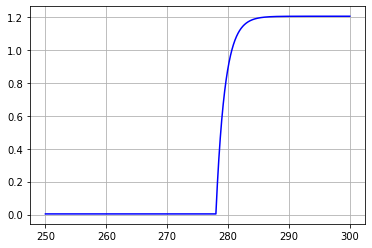

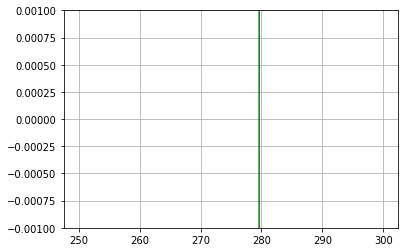

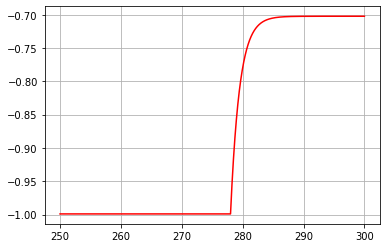

#########################


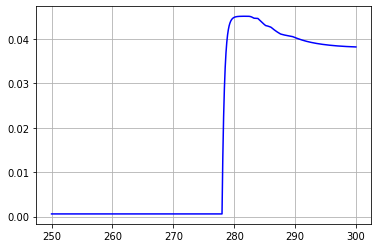

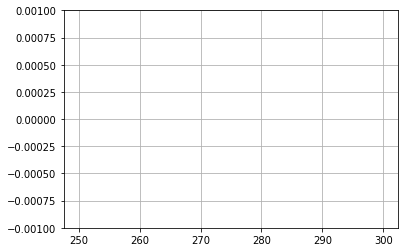

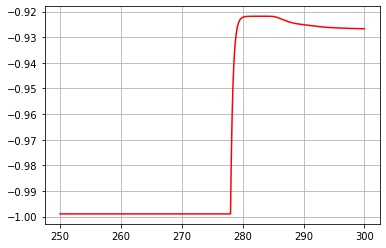

In [10]:
part1_1 = np.zeros(( seim_1.shape ))
part1_2 = part1_1.copy()
part2_1 = part1_1.copy()
part2_2 = part1_1.copy()

part1_1[0,:] = ( 1 - seim_1[0,:] ) * z1ei_1[0,:]
part1_2[0,:] = - seim_1[0,:]
der1 = part1_1[0,:] + part1_2[0,:]

part2_1[0,:] = ( 1. - seim_2[0,:] ) * z1ei_2[0,:]
part2_2[0,:] = - seim_2[0,:]
der2 = part2_1[0,:] + part2_2[0,:]

limit = 1e-10

#for k in np.arange(27590, 27700,1):
for k in np.arange(0, 30000,1000):
    print("t = ", k*dt)
    #print(part1_1[0,k] + part1_2[0,k])
    if part1_1[0,k] + part1_2[0,k] < -limit:
        print("negative derivative")
    elif part1_1[0,k] + part1_2[0,k] > limit:
        print("positive derivative")
    else:
        print("zero derivative")
  
print('++++++++++++++++++++++++++++')
#for k in np.arange(27590, 27700, 1):
for k in np.arange(0, 30000,1000):
    print("t = ", k*dt)
    #print(part2_1[0,k] + part2_2[0,k])
    if part2_1[0,k] + part2_2[0,k] < -limit:
        print("negative derivative")
    elif part2_1[0,k] + part2_2[0,k] > limit:
        print("positive derivative")
    else:
        print("zero derivative")


"""
plt.plot(np.arange(0,dur+dt,dt), part1_1[0,:], color = 'blue')
plt.show()
#plt.plot(np.arange(0,dur+dt,dt), z1ei_1[0,:], color = 'green')
plt.plot(np.arange(0,dur+dt,dt), part1_2[0,:], color = 'red')
plt.show()


plot_t = [145,165]
plt.plot(np.arange(plot_t[0],plot_t[1],dt), part1_1[0,int(plot_t[0]/dt):int(plot_t[1]/dt)], color = 'blue')
plt.show()
#plt.plot(np.arange(0,plot_t,dt), z1ei_1[0,:int(plot_t/dt)], color = 'green')
plt.plot(np.arange(plot_t[0],plot_t[1],dt), part1_2[0,int(plot_t[0]/dt):int(plot_t[1]/dt)], color = 'red')
plt.show()
"""

plot_t = [250,300]
plt.plot(np.arange(plot_t[0],plot_t[1],dt), part1_1[0,int(plot_t[0]/dt):int(plot_t[1]/dt)], color = 'blue')
#plt.ylim(0., 1.05)
plt.show()
plt.plot(np.arange(plot_t[0],plot_t[1],dt), der1[int(plot_t[0]/dt):int(plot_t[1]/dt)], color = 'green')
plt.ylim(-0.001, 0.001)
plt.show()
#plt.plot(np.arange(0,plot_t,dt), z1ei_1[0,:int(plot_t/dt)], color = 'green')
plt.plot(np.arange(plot_t[0],plot_t[1],dt), part1_2[0,int(plot_t[0]/dt):int(plot_t[1]/dt)], color = 'red')
plt.show()

print('#########################')

plt.plot(np.arange(plot_t[0],plot_t[1],dt), part2_1[0,int(plot_t[0]/dt):int(plot_t[1]/dt)], color = 'blue')
plt.show()
plt.plot(np.arange(plot_t[0],plot_t[1],dt), der2[int(plot_t[0]/dt):int(plot_t[1]/dt)], color = 'green')
plt.ylim(-0.001, 0.001)
plt.show()
plt.plot(np.arange(plot_t[0],plot_t[1],dt), part2_2[0,int(plot_t[0]/dt):int(plot_t[1]/dt)], color = 'red')
plt.show()

In [43]:
params_0 = []
params_1 = []

state_0 = []
state_1 = []

mu_i = 0.35

aln = ALNModel()
data.set_parameters(aln)
aln.params.duration = 1000.
aln.params.dt = 0.1
control_ = aln.getZeroControl()
control_[0,3,500:6500] = 0.3

while mu_i <= 0.7:
    mu_e = 0.42
    
    transition = True
    found_ = False
    s = 0.0001
    
    while not found_:
        
        aln.params.ext_exc_current = mu_e * 5.
        aln.params.ext_inh_current = mu_i * 5.
    
        setinit(initVars, aln)
        state = fo.updateFullState(aln, control_, aln.state_vars)

        if aln.rates_exc[0,-1] > 5.:
            params_1.append( [mu_e, mu_i] )
            state_1.append(state)
            params_0.append( [mu_e - s, mu_i] )
            
            aln.params.ext_exc_current = ( mu_e - s ) * 5.
            setinit(initVars, aln)
            state = fo.updateFullState(aln, control_, aln.state_vars)
            state_0.append(state)
            
            break
            
        mu_e += s
    
    mu_i += 0.01
    
params0 = np.zeros (( len(params_0), 2 ))
params1 = np.zeros (( len(params_0), 2 ))

for k in range(len(params_0)):
    params0[k,0] = params_0[k][0]
    params0[k,1] = params_0[k][1]
    params1[k,0] = params_1[k][0]
    params1[k,1] = params_1[k][1]
    
print(params0)
print(params1)

[[0.4319 0.35  ]
 [0.432  0.36  ]
 [0.4321 0.37  ]
 [0.4322 0.38  ]
 [0.4322 0.39  ]
 [0.4323 0.4   ]
 [0.4324 0.41  ]
 [0.4324 0.42  ]
 [0.4325 0.43  ]
 [0.4326 0.44  ]
 [0.4326 0.45  ]
 [0.4327 0.46  ]
 [0.4328 0.47  ]
 [0.4328 0.48  ]
 [0.4329 0.49  ]
 [0.433  0.5   ]
 [0.433  0.51  ]
 [0.4331 0.52  ]
 [0.4331 0.53  ]
 [0.4332 0.54  ]
 [0.4332 0.55  ]
 [0.4333 0.56  ]
 [0.4334 0.57  ]
 [0.4334 0.58  ]
 [0.4335 0.59  ]
 [0.4335 0.6   ]
 [0.4336 0.61  ]
 [0.4336 0.62  ]
 [0.4337 0.63  ]
 [0.4337 0.64  ]
 [0.4338 0.65  ]
 [0.4338 0.66  ]
 [0.4339 0.67  ]
 [0.4339 0.68  ]
 [0.434  0.69  ]]
[[0.432  0.35  ]
 [0.4321 0.36  ]
 [0.4322 0.37  ]
 [0.4323 0.38  ]
 [0.4323 0.39  ]
 [0.4324 0.4   ]
 [0.4325 0.41  ]
 [0.4325 0.42  ]
 [0.4326 0.43  ]
 [0.4327 0.44  ]
 [0.4327 0.45  ]
 [0.4328 0.46  ]
 [0.4329 0.47  ]
 [0.4329 0.48  ]
 [0.433  0.49  ]
 [0.4331 0.5   ]
 [0.4331 0.51  ]
 [0.4332 0.52  ]
 [0.4332 0.53  ]
 [0.4333 0.54  ]
 [0.4333 0.55  ]
 [0.4334 0.56  ]
 [0.4335 0.57  ]
 [0.4335 0.58

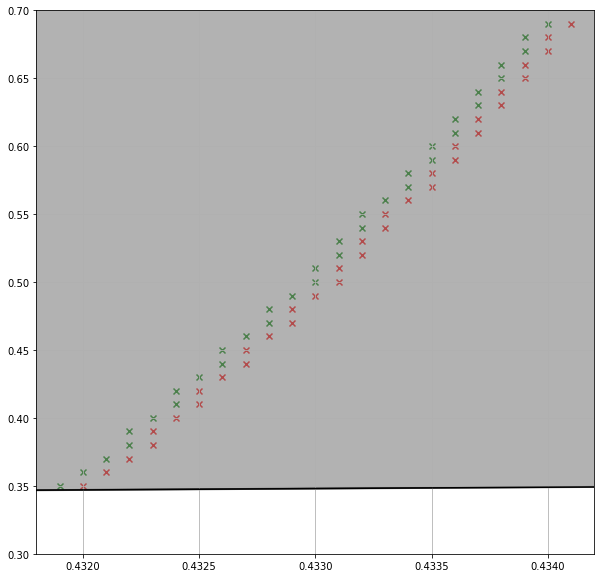

In [47]:
"""
dt=0.01
[[0.4321 0.35  ]
 [0.4328 0.45  ]
 [0.4334 0.55  ]
 [0.4339 0.65  ]]
[[0.4322 0.35  ]
 [0.4329 0.45  ]
 [0.4335 0.55  ]
 [0.434  0.65  ]]
"""


with open('boundary_bi_granular.pickle','rb') as file:
    load_array= pickle.load(file)
boundary_bi_exc = load_array[0]
boundary_bi_inh = load_array[1]

fig, ax = plt.subplots(figsize = (10,10))
ax.set_ylim(0.3, .7)
ax.set_xlim(0.4318, .4342)
#ax.set_xticks(np.arange(0.1, 0.8, 0.1))

vertices = np.zeros(( len(boundary_bi_exc), 2 ))
for i in range(vertices.shape[0]):
    vertices[i,0] = boundary_bi_exc[i]
    vertices[i,1] = boundary_bi_inh[i]
path = mpath.Path(vertices)

patch = patches.PathPatch(path, facecolor='grey', alpha=0.6, lw=2)
ax.add_patch(patch)

x, y = zip(*path.vertices)
line, = ax.plot(x, y, markersize=0, color='black')

ax.scatter( params0[:,0], params0[:,1], color = 'green', marker='x' )
ax.scatter( params1[:,0], params1[:,1], color = 'red', marker='x' )

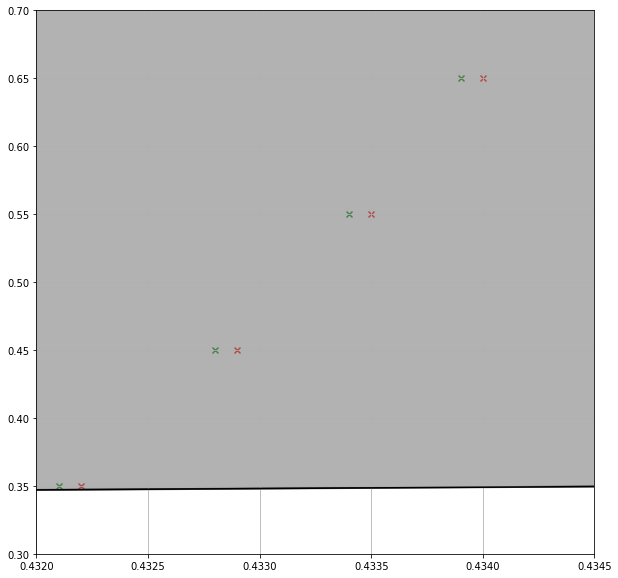

In [75]:
"""
dt = 0.1
[[0.4321 0.35  ]
 [0.4328 0.45  ]
 [0.4334 0.55  ]
 [0.4339 0.65  ]]
[[0.4322 0.35  ]
 [0.4329 0.45  ]
 [0.4335 0.55  ]
 [0.434  0.65  ]]
"""


with open('boundary_bi_granular.pickle','rb') as file:
    load_array= pickle.load(file)
boundary_bi_exc = load_array[0]
boundary_bi_inh = load_array[1]

fig, ax = plt.subplots(figsize = (10,10))
ax.set_ylim(0.3, .7)
ax.set_xlim(0.432, .4345)
#ax.set_xticks(np.arange(0.1, 0.8, 0.1))

vertices = np.zeros(( len(boundary_bi_exc), 2 ))
for i in range(vertices.shape[0]):
    vertices[i,0] = boundary_bi_exc[i]
    vertices[i,1] = boundary_bi_inh[i]
path = mpath.Path(vertices)

patch = patches.PathPatch(path, facecolor='grey', alpha=0.6, lw=2)
ax.add_patch(patch)

x, y = zip(*path.vertices)
line, = ax.plot(x, y, markersize=0, color='black')

ax.scatter( params0[:,0], params0[:,1], color = 'green', marker='x' )
ax.scatter( params1[:,0], params1[:,1], color = 'red', marker='x' )

[0.00040611 0.00040611 0.00040611]
[0.00040611 0.00040611 0.00040611]
---
[0.00040611 0.00040611 0.00040611]
[0.00040611 0.00040611 0.00040611]
---
[0.00040611 0.00040611 0.00040611]
[0.00040611 0.00040611 0.00040611]
---
[0.00040611 0.00040611 0.00040611]
[0.00040611 0.00040611 0.00040611]
---


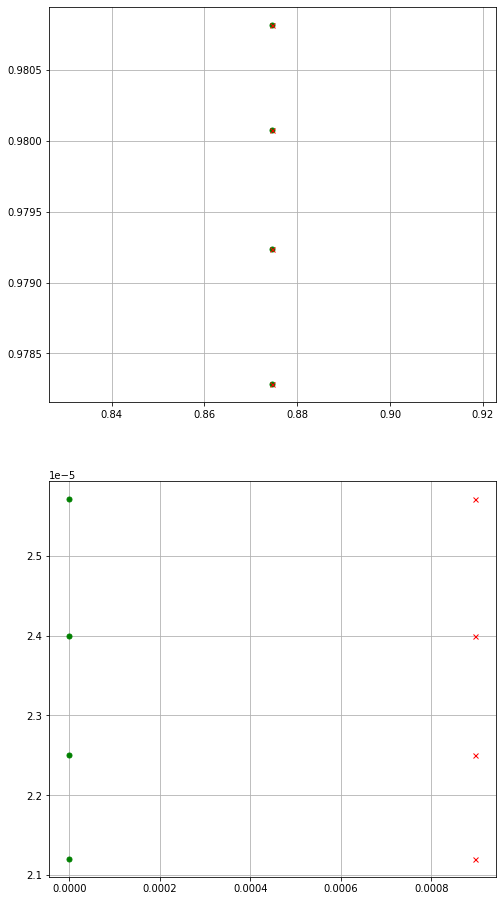

In [80]:
fig, ax = plt.subplots(2,1, figsize = (8,16))
ms_ = 5

for k in range(len(state_0)):
    ax[0].plot(np.amax(state_0[k][0,5,:]), np.amax(state_0[k][0,6,:]), color='green', marker='o', markersize=ms_)
    ax[0].plot(np.amax(state_1[k][0,5,:]), np.amax(state_1[k][0,6,:]), color='red', marker='x', markersize=ms_)
    
    ax[1].plot(np.amin(state_0[k][0,9,:]), np.amin(state_0[k][0,10,:]), color='green', marker='o', markersize=ms_)
    ax[1].plot(np.amin(state_1[k][0,9,:]), np.amin(state_1[k][0,10,:]), color='red', marker='x', markersize=ms_)

    
    print(state_0[k][0,10,101:104])
    print(state_1[k][0,10,101:104])
    print('---')
    
plt.show()

In [49]:
green_high = []
green_low = []
red_max = []
red_high = []

for k in range(params0.shape[0]):
    print(k)
    
    aln.params.ext_exc_current = params0[k,0] * 5.
    aln.params.ext_inh_current = params0[k,1] * 5.
    setinit(initVars, aln)
    state = fo.updateFullState(aln, aln.getZeroControl(), aln.state_vars)
    green_high.append(state)
    state = fo.updateFullState(aln, control_, aln.state_vars)
    green_low.append(state)
    
    aln.params.ext_exc_current = params1[k,0] * 5.
    aln.params.ext_inh_current = params1[k,1] * 5.
    setinit(initVars, aln)
    state = fo.updateFullState(aln, aln.getZeroControl(), aln.state_vars)
    red_high.append(state)
    state = fo.updateFullState(aln, control_, aln.state_vars)
    red_max.append(state)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


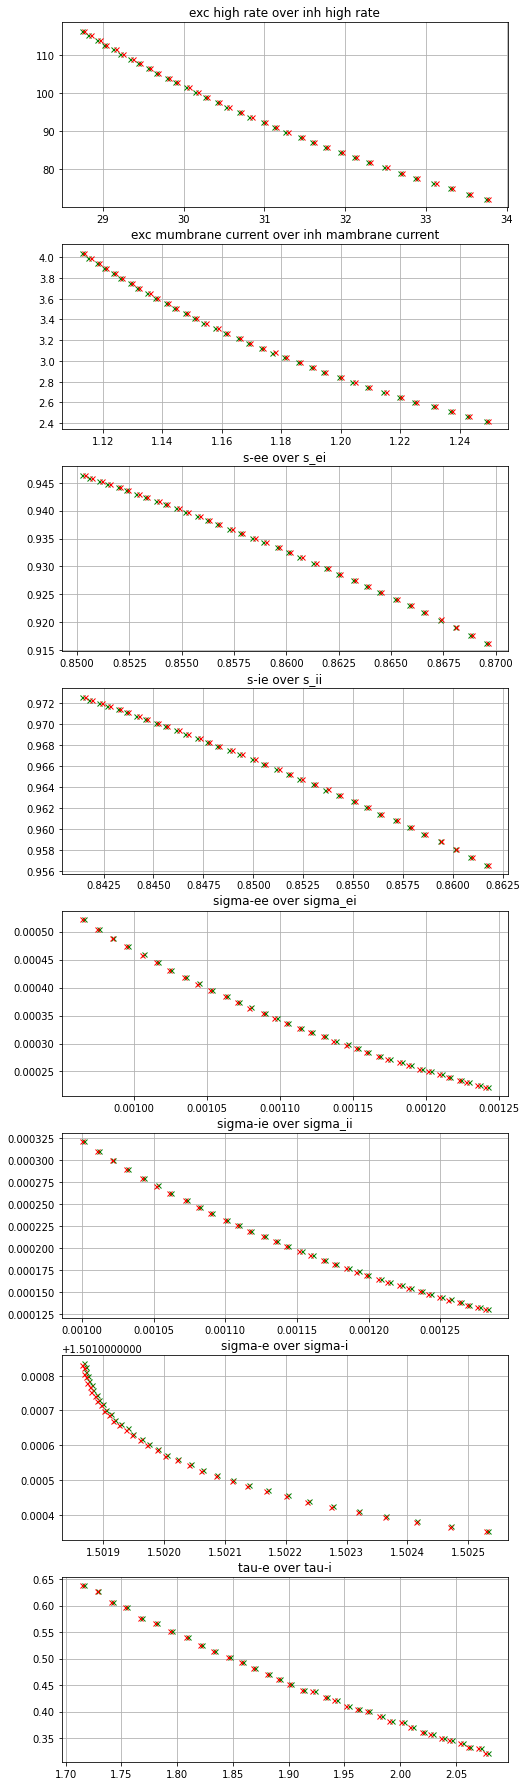

In [50]:
fig, ax = plt.subplots(8,1, figsize = (8,32))
ms_ = 5

for k in range(len(green_high)):
    ax[0].set_title('exc high rate over inh high rate')
    ax[0].plot(green_high[k][0,0,-1], green_high[k][0,1,-1], color='green', marker='x', markersize=ms_)
    ax[0].plot(red_high[k][0,0,-1], red_high[k][0,1,-1], color='red', marker='x', markersize=ms_)
    
    ax[1].set_title('exc mumbrane current over inh mambrane current')
    ax[1].plot(green_high[k][0,2,-1], green_high[k][0,3,-1], color='green', marker='x', markersize=ms_)
    ax[1].plot(red_high[k][0,2,-1], red_high[k][0,3,-1], color='red', marker='x', markersize=ms_)
    
    ax[2].set_title('s-ee over s_ei')
    ax[2].plot(green_high[k][0,5,-1], green_high[k][0,6,-1], color='green', marker='x', markersize=ms_)
    ax[2].plot(red_high[k][0,5,-1], red_high[k][0,6,-1], color='red', marker='x', markersize=ms_)
    
    ax[3].set_title('s-ie over s_ii')
    ax[3].plot(green_high[k][0,7,-1], green_high[k][0,8,-1], color='green', marker='x', markersize=ms_)
    ax[3].plot(red_high[k][0,7,-1], red_high[k][0,8,-1], color='red', marker='x', markersize=ms_)
    
    ax[4].set_title('sigma-ee over sigma_ei')
    ax[4].plot(green_high[k][0,9,-1], green_high[k][0,10,-1], color='green', marker='x', markersize=ms_)
    ax[4].plot(red_high[k][0,9,-1], red_high[k][0,10,-1], color='red', marker='x', markersize=ms_)
    
    ax[5].set_title('sigma-ie over sigma_ii')
    ax[5].plot(green_high[k][0,11,-1], green_high[k][0,12,-1], color='green', marker='x', markersize=ms_)
    ax[5].plot(red_high[k][0,11,-1], red_high[k][0,12,-1], color='red', marker='x', markersize=ms_)
    
    ax[6].set_title('sigma-e over sigma-i')
    ax[6].plot(green_high[k][0,15,-1], green_high[k][0,16,-1], color='green', marker='x', markersize=ms_)
    ax[6].plot(red_high[k][0,15,-1], red_high[k][0,16,-1], color='red', marker='x', markersize=ms_)
    
    ax[7].set_title('tau-e over tau-i')
    ax[7].plot(green_high[k][0,18,-1], green_high[k][0,19,-1], color='green', marker='x', markersize=ms_)
    ax[7].plot(red_high[k][0,18,-1], red_high[k][0,19,-1], color='red', marker='x', markersize=ms_)
    
plt.show()

0.446


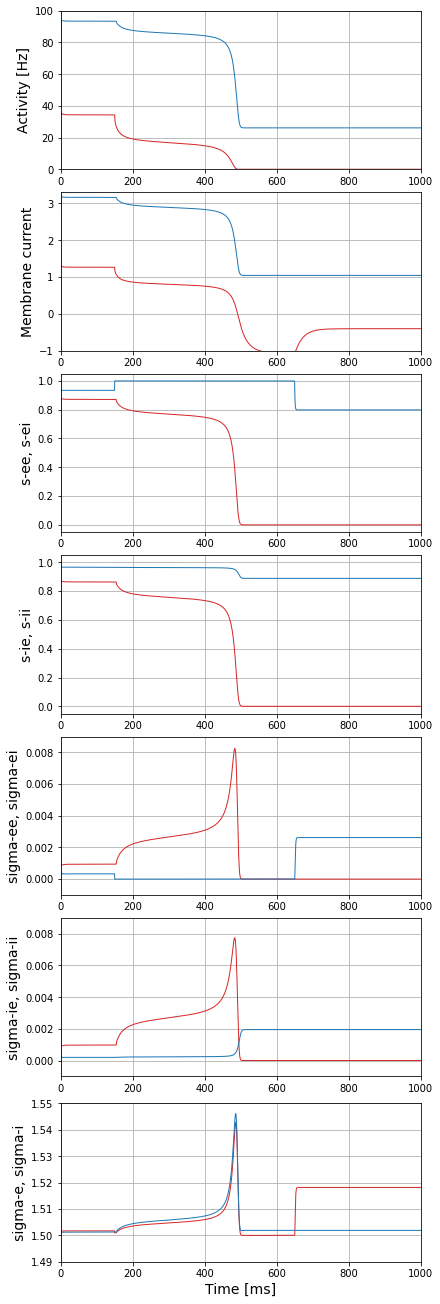

0.447


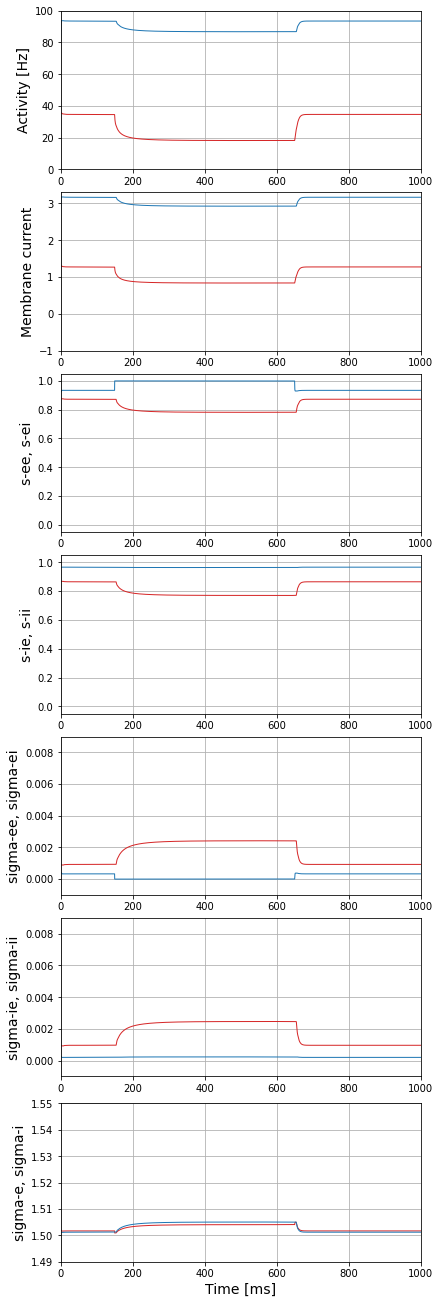

In [60]:
mu_i = 0.5
aln = ALNModel()
data.set_parameters(aln)
aln.params.duration = 1000.
dt = 0.001
aln.params.dt = dt
control_ = aln.getZeroControl()
control_[0,3,int(150/dt):int(650/dt)] = 20.
mu_e = 0.446
linewidth_ = 1.
fs_ = 14

s = 0.001
found_ = False

while mu_e < 0.7:

    aln.params.ext_exc_current = mu_e * 5.
    aln.params.ext_inh_current = mu_i * 5.

    setinit(initVars, aln)
    state = fo.updateFullState(aln, control_, aln.state_vars)
    if np.amax(aln.rates_exc[0,:]) > 150.:
        break
    print(mu_e)
    fig, axs = plt.subplots( 7,1, figsize=(6, 18), constrained_layout=True)
    axs[0].plot(aln.t, aln.state[state_vars[0]][0,:], linewidth=linewidth_, color=exc_red,
            label='E')
    axs[0].plot(aln.t, aln.state[state_vars[1]][0,:], linewidth=linewidth_, color=inh_blue,
            label='I')
    
    axs[1].plot(aln.t, aln.state[state_vars[2]][0,:], linewidth=linewidth_, color=exc_red)
    axs[1].plot(aln.t, aln.state[state_vars[3]][0,:], linewidth=linewidth_, color=inh_blue)
    axs[2].plot(aln.t, aln.state[state_vars[5]][0,:], linewidth=linewidth_, color=exc_red)
    axs[2].plot(aln.t, aln.state[state_vars[6]][0,:], linewidth=linewidth_, color=inh_blue)
    axs[3].plot(aln.t, aln.state[state_vars[7]][0,:], linewidth=linewidth_, color=exc_red)
    axs[3].plot(aln.t, aln.state[state_vars[8]][0,:], linewidth=linewidth_, color=inh_blue)
    axs[4].plot(aln.t, aln.state[state_vars[9]][0,:], linewidth=linewidth_, color=exc_red)
    axs[4].plot(aln.t, aln.state[state_vars[10]][0,:], linewidth=linewidth_, color=inh_blue)
    axs[5].plot(aln.t, aln.state[state_vars[11]][0,:], linewidth=linewidth_, color=exc_red)
    axs[5].plot(aln.t, aln.state[state_vars[12]][0,:], linewidth=linewidth_, color=inh_blue)
    axs[6].plot(aln.t, aln.state[state_vars[15]][0,:], linewidth=linewidth_, color=exc_red)
    axs[6].plot(aln.t, aln.state[state_vars[16]][0,:], linewidth=linewidth_, color=inh_blue)
    
    axs[1].set_ylabel('Membrane current', fontsize=fs_)
    axs[2].set_ylabel('s-ee, s-ei', fontsize=fs_)
    axs[3].set_ylabel('s-ie, s-ii', fontsize=fs_)
    axs[4].set_ylabel('sigma-ee, sigma-ei', fontsize=fs_)
    axs[5].set_ylabel('sigma-ie, sigma-ii', fontsize=fs_)
    axs[6].set_ylabel('sigma-e, sigma-i', fontsize=fs_)
    
    axs[6].set_xlabel('Time [ms]', fontsize=fs_)
    axs[0].set_ylabel('Activity [Hz]', fontsize=fs_)
    
    for k in range(7):
        axs[k].set_xlim([0,1000])
        
    axs[0].set_ylim([0,100])
    axs[1].set_ylim([-1.,3.3])
    axs[2].set_ylim([-.05,1.05])
    axs[3].set_ylim([-.05,1.05])
    axs[4].set_ylim([-.001,0.009])
    axs[5].set_ylim([-.001,0.009])
    axs[6].set_ylim([1.49, 1.55])
    
    plt.show()
    

    if aln.rates_exc[0,-1] > 5.:
        control_ *= 5.
    else:
        mu_e += s